In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload

from sklearn import naive_bayes, tree, ensemble
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score, log_loss

import sys
sys.path.insert(0,'../libs/')
import data_cleaning as dc
import explore as expl
import logloss as bof

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
reload(expl)
alldf, dummydf = expl.load_data("../data/train.csv")

# splits data.
rows = np.random.choice(dummydf.index.values,
  int( round(len(dummydf)*.6) ), replace=False)
alldf_train = dummydf.ix[rows]
alldf_test = dummydf.drop(rows)
alldf_dummies_train = dummydf.ix[rows]
alldf_dummies_test = dummydf.drop(rows)

In [3]:
alldf['OutcomeType'].value_counts()

Transfer           5505
Adoption           4272
Euthanasia          710
Return_to_owner     500
Died                147
Name: OutcomeType, dtype: int64

In [4]:
# Naive Bayes
train_features = alldf_dummies_train
train_outcomes = alldf.ix[alldf_dummies_train.index]['OutcomeType']
test_features  = alldf_dummies_test
test_outcomes  = alldf.ix[alldf_dummies_test.index]['OutcomeType']

bnb = naive_bayes.BernoulliNB()
bnb.fit(train_features,train_outcomes)

predictions = bnb.predict(test_features)
print("Accuracy:",accuracy_score(test_outcomes,predictions))
print()
print("Predictions:\n",pd.Series(predictions).value_counts())
probabilities = bnb.predict_proba(test_features)
print()
print("Log loss:",log_loss(test_outcomes,probabilities))

Accuracy: 0.735327186868

Predictions:
 Adoption    2417
Transfer    2030
dtype: int64

Log loss: 0.836601287757


In [9]:
# Decision Tree.
# splits data.
rows = np.random.choice(dummydf.index.values,
  int( round(len(dummydf)*.6) ), replace=False)
alldf_train = dummydf.ix[rows]
alldf_test = dummydf.drop(rows)
alldf_dummies_train = dummydf.ix[rows]
alldf_dummies_test = dummydf.drop(rows)

train_features = alldf_train
train_outcomes = alldf.ix[alldf_train.index]['OutcomeType']
test_features  = alldf_test
test_outcomes  = alldf.ix[alldf_test.index]['OutcomeType']

bnb = tree.DecisionTreeClassifier(max_depth=6)
bnb.fit(train_features,train_outcomes)

predictions = bnb.predict(test_features)
print("Accuracy:",accuracy_score(test_outcomes,predictions))
print()
print("Predictions:\n",pd.Series(predictions).value_counts())
probabilities = bnb.predict_proba(test_features)
print()
print("Log loss:",log_loss(test_outcomes,probabilities))
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(
        bnb,
        feature_names=alldf_train.columns,
        class_names=bnb.classes_,
        out_file=f)

Accuracy: 0.763211153587

Predictions:
 Transfer           2612
Adoption           1729
Return_to_owner      63
Euthanasia           43
dtype: int64

Log loss: 0.897482278257


In [6]:
# Series of trees, try different depths.
accuracies, log_losses = [],[]
max_depths = range(1,10)
for max_depth in max_depths:
    train_features = alldf_train
    train_outcomes = alldf.ix[alldf_train.index]['OutcomeType']
    test_features  = alldf_test
    test_outcomes  = alldf.ix[alldf_test.index]['OutcomeType']

    bnb = tree.DecisionTreeClassifier(max_depth=max_depth)
    bnb.fit(train_features,train_outcomes,)

    predictions = bnb.predict(test_features)
    accuracies.append(accuracy_score(test_outcomes,predictions))
    probabilities = bnb.predict_proba(test_features)
    log_losses.append(log_loss(test_outcomes,probabilities))


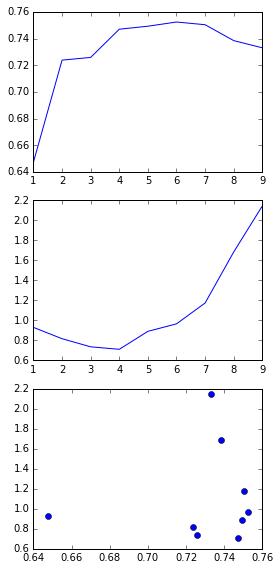

In [8]:
# Check performances of trees.
fig,ax = plt.subplots(3,1)
ax[0].plot(max_depths,accuracies)
ax[1].plot(max_depths,log_losses)
ax[2].plot(accuracies,log_losses,'o')
#for a in ax: pt.fix_lims(a)
fig.set_size_inches(4,8)
fig.tight_layout()